### Getting data ready


In [25]:
# Data Analysis imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
data = pd.read_csv('heart-disease.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [28]:
len(data)

303

In [29]:
data["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

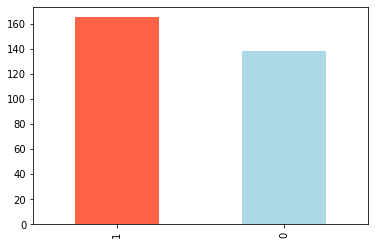

In [30]:
data["target"].value_counts().plot(kind="bar", color = ["tomato","lightblue"]);

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [32]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [33]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [34]:
data['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [35]:
pd.crosstab(data["target"],data["sex"])

sex,0,1
target,,
0,24,114
1,72,93


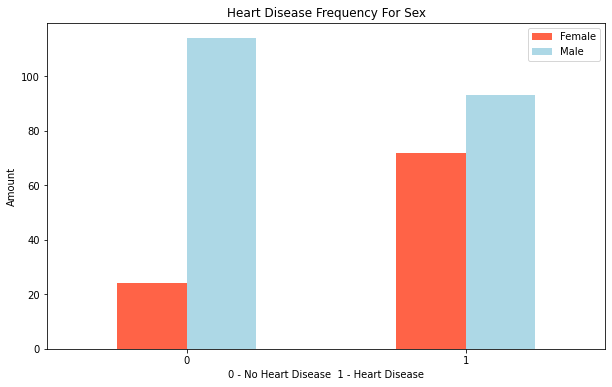

In [36]:
pd.crosstab(data["target"],data["sex"]).plot(kind="bar",figsize=(10,6),color=["tomato","lightblue"]);


plt.title("Heart Disease Frequency For Sex")
plt.xlabel("0 - No Heart Disease  1 - Heart Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);


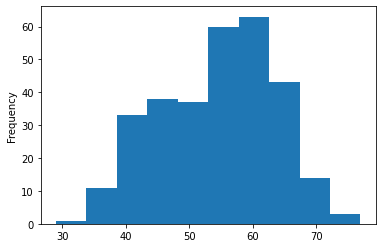

In [37]:
data["age"].plot.hist();

In [39]:
pd.crosstab(data["cp"],data["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


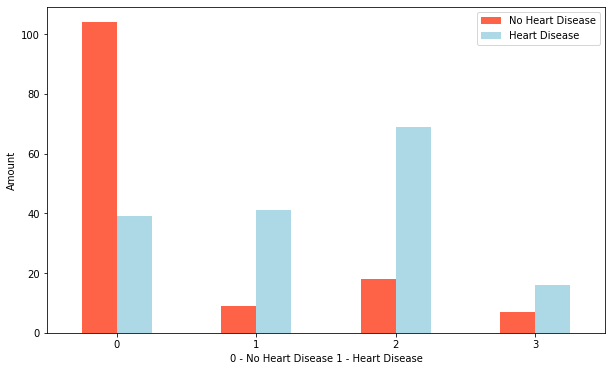

In [47]:
pd.crosstab(data["cp"],data["target"]).plot(kind="bar",color=["tomato","lightblue"],figsize=(10,6))

plt.xlabel("0 - No Heart Disease 1 - Heart Disease")
plt.legend(["No Heart Disease" , "Heart Disease"])
plt.ylabel("Amount");
plt.xticks(rotation=0);

## Modeling


In [50]:
x = data.drop("target",axis=1)
y  = data["target"]

In [51]:
from sklearn.model_selection import train_test_split

np.random.seed(42)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


lrc = LogisticRegression()
knn = KNeighborsClassifier()
rfc  =RandomForestClassifier()








In [59]:
np.random.seed(42)

lrc.fit(x_train,y_train)
knn.fit(x_train,y_train)
rfc.fit(x_train,y_train)



c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier()

In [60]:
lrc.score(x_test,y_test)

0.8852459016393442

In [61]:
knn.score(x_test,y_test)

0.6885245901639344

In [62]:
rfc.score(x_test,y_test)

0.8360655737704918

In [63]:
train_scores =[]
test_scores = []

for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors = i)

    knn.fit(x_train,y_train)

    train_scores.append(knn.score(x_train,y_train))

    test_scores.append(knn.score(x_test,y_test))



    

In [65]:
neighbors = range(1,21)

Maximum Test Score is : 75.41%


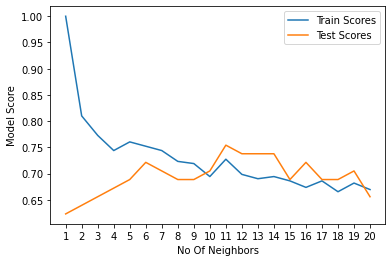

In [70]:
plt.plot(neighbors,train_scores,label="Train Scores")
plt.plot(neighbors,test_scores,label="Test Scores")
plt.xticks(range(1,21,1))
plt.xlabel("No Of Neighbors")
plt.ylabel("Model Score")
plt.legend();

print(f"Maximum Test Score is : {max(test_scores)*100:.2f}%")

In [77]:
reg_grid = {"C":np.logspace(-4,4,20),
"solver" : ["liblinear"]}

rf_grid  = {"n_estimators" : np.arange(10,1000,50),
"max_depth" : [None,3,5,10],
"min_samples_split" : np.arange(2,20,2),
"min_samples_leaf" : np.arange(1,20,2)
}

In [72]:
from sklearn.model_selection import RandomizedSearchCV
np.random.seed(42)


rs_reg = RandomizedSearchCV(LogisticRegression(),
param_distributions=reg_grid,
cv=5,
n_iter = 20,
verbose = True)

rs_reg.fit(x_train,y_train)



Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [74]:
rs_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [75]:
rs_reg.score(x_test,y_test)


0.8852459016393442

In [78]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
param_distributions=rf_grid,
cv=5,
n_iter = 20,
verbose = True)

rs_rf.fit(x_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [79]:
rs_rf.score(x_test,y_test)

0.8688524590163934

In [80]:
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

grid_reg = {"C" : np.logspace(-4,4,30),
"solver" : ["liblinear"]}


gs_reg  = GridSearchCV(LogisticRegression(),
param_grid = grid_reg,
cv=5,
verbose=True)



gs_reg.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [81]:
gs_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [82]:
gs_reg.score(x_test,y_test)

0.8852459016393442